In [ ]:
"""Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not 
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not """

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df  = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:

#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Undergrad"] = LE.fit_transform(df["Undergrad"])
df["Marital.Status"] = LE.fit_transform(df["Marital.Status"])
df["Urban"] = LE.fit_transform(df["Urban"])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


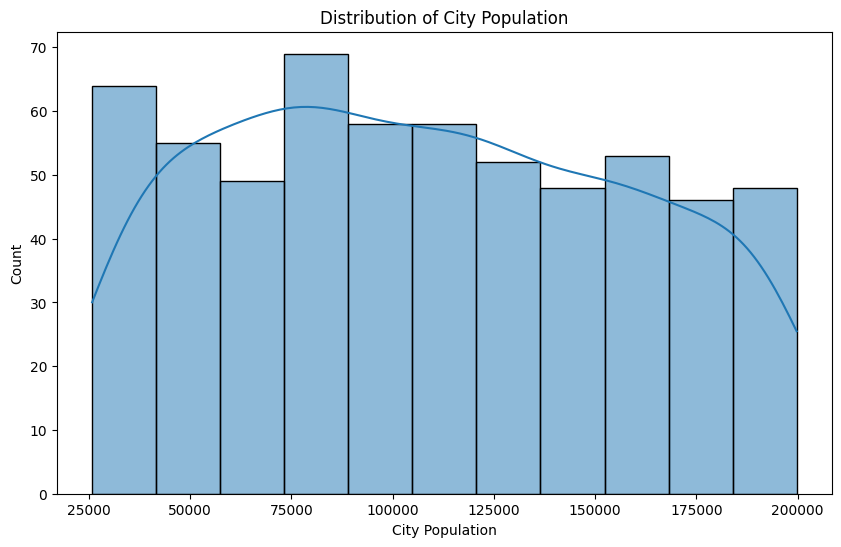

In [9]:
# Histograms or density plots for numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='City.Population', kde=True)
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.show()

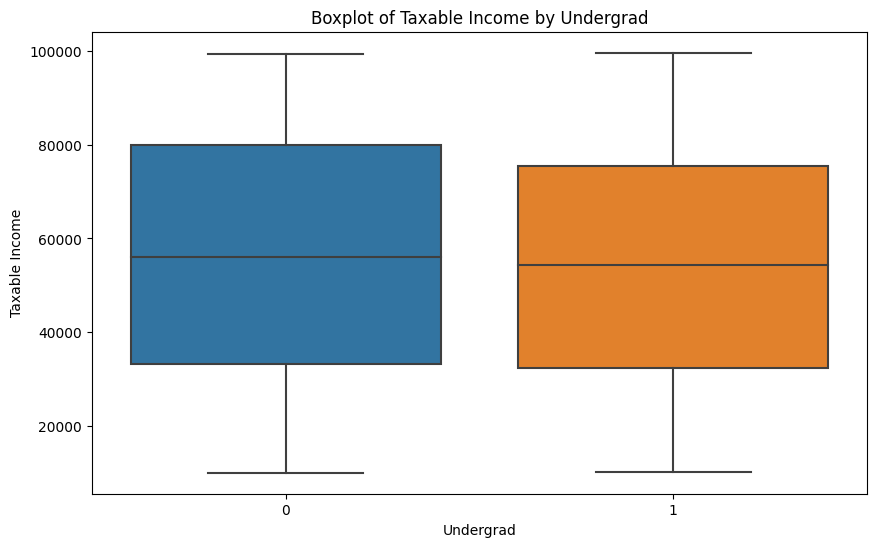

In [10]:
# Boxplots for categorical variables vs. target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Undergrad', y='Taxable.Income', data=df)
plt.title('Boxplot of Taxable Income by Undergrad')
plt.xlabel('Undergrad')
plt.ylabel('Taxable Income')
plt.show()

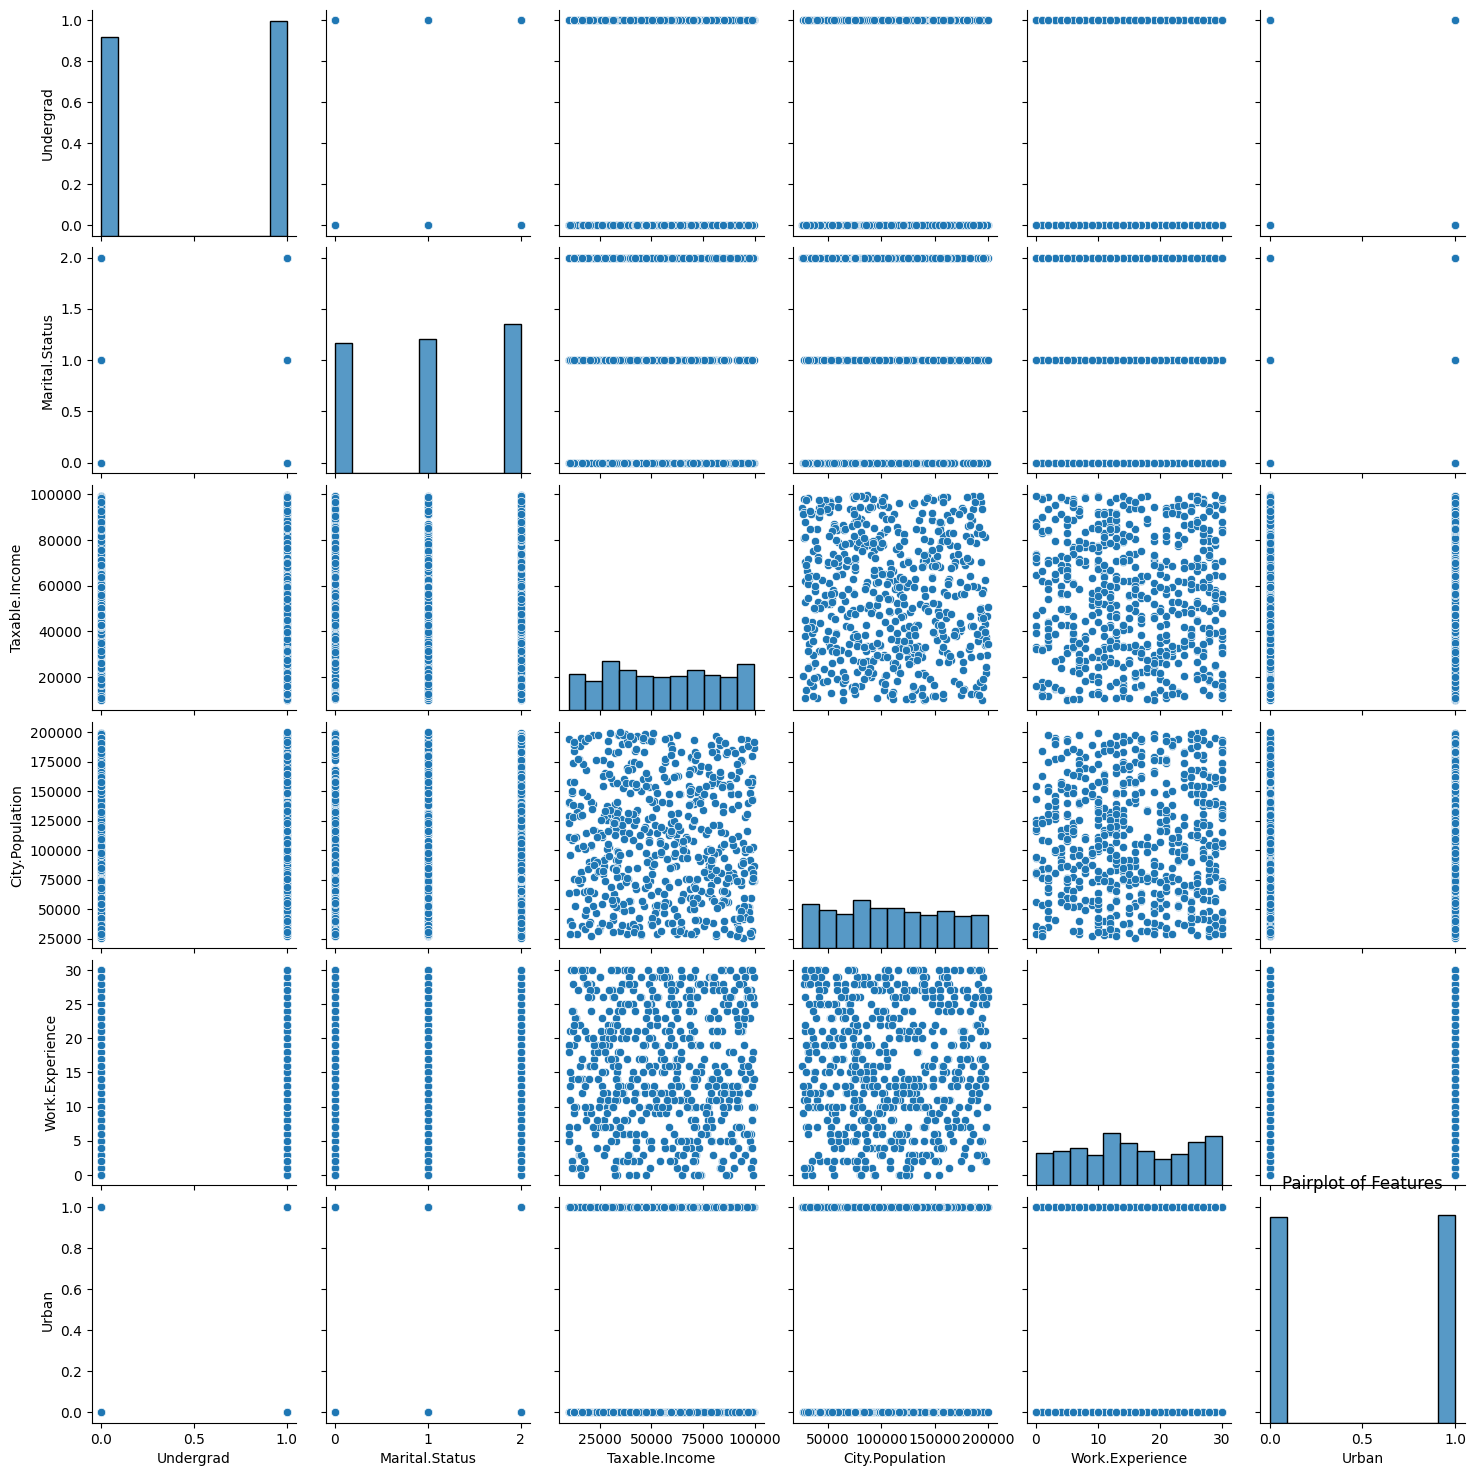

In [11]:
# Pairplot for feature interactions
sns.pairplot(df)
plt.title('Pairplot of Features')
plt.show()


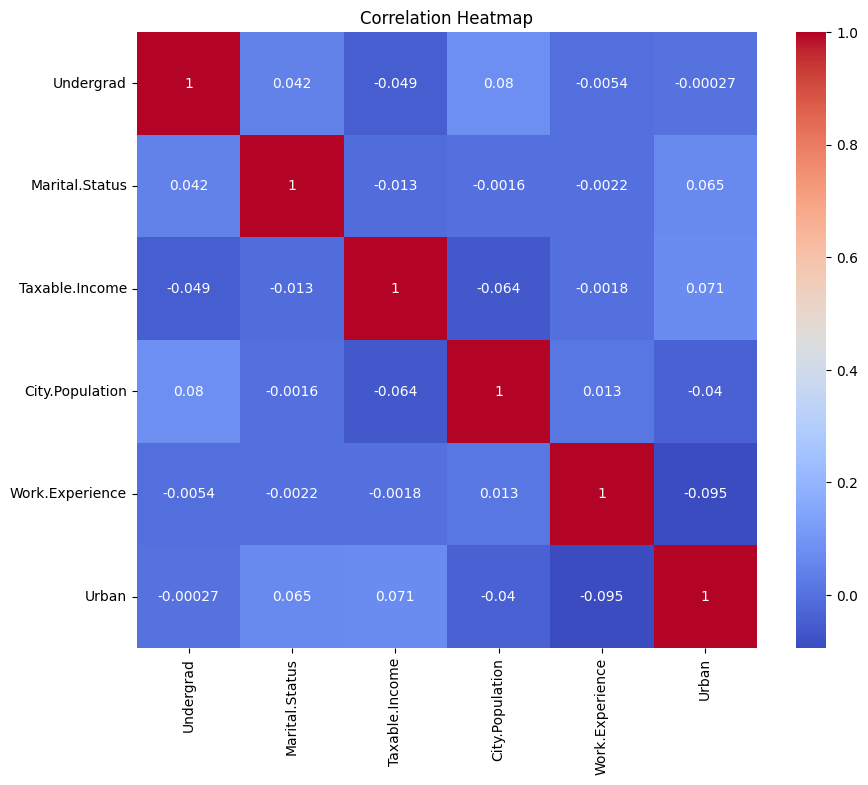

In [12]:
# Correlation heatmap of features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values if any
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Encode categorical variables
label_encoder = LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
# Repeat for other categorical variables if any

# Split the data into features (X) and target variable (y)
X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']


In [25]:
# Initialize random forest classifiers with class weights
rf_entropy = RandomForestClassifier(criterion='entropy', class_weight='balanced')
rf_gini = RandomForestClassifier(criterion='gini', class_weight='balanced')


In [26]:
# Initialize random forest classifiers with tuned hyperparameters
rf_entropy = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=10, min_samples_split=2)
rf_gini = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, min_samples_split=2)


In [27]:
# Fit the model to get feature importances
rf_entropy.fit(X, y)
rf_gini.fit(X, y)

# Get feature importances
feature_importances_entropy = rf_entropy.feature_importances_
feature_importances_gini = rf_gini.feature_importances_

# Print feature importances
print("Feature Importances (Entropy):", feature_importances_entropy)
print("Feature Importances (Gini):", feature_importances_gini)

Feature Importances (Entropy): [0.09589981 0.11438702 0.38898705 0.30532497 0.09540114]
Feature Importances (Gini): [0.06669926 0.08812366 0.4731267  0.3016212  0.07042918]


In [4]:
# Define the target variable
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Good' if x > 30000 else 'Risky')
Y = df['Taxable.Income']
X = df.iloc[:,[0,1,3,4,5]]

In [5]:
# step5: Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state = 67)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtcls = DecisionTreeClassifier(criterion = "entropy")
dtcls.fit(X_train,Y_train)
Y_Pred_train = dtcls.predict(X_train)
Y_Pred_test = dtcls.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

ac_train = accuracy_score(Y_train, Y_Pred_train)
print("Accuracy Score train =", round(ac_train, 3))

ac_test = accuracy_score(Y_test, Y_Pred_test)
print("Accuracy Score test =", round(ac_test, 3))


Accuracy Score train = 1.0
Accuracy Score test = 0.656
